# Importing the libraries

In [26]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn import preprocessing

# Create the function use to load_file and load_huge_file (if necessary do the downsample)

In [ ]:
mult = 5 #mult設為5(代表正常資料數量是異常資料數量的5倍)

def load_file(path):
    data = pd.read_csv(path, sep=',')

    is_benign = data[' Label']=='BENIGN' #如果label是BENIGN，則取名為is_benign
    flows_ok = data[is_benign] #取出label是BENIGN的資料，取名為flows_ok
    flows_ddos_full = data[~is_benign] #取出label不是BENIGN的資料，取名為flows_ddos_full
    
    sizeDownSample = len(flows_ok)*mult #flows_ok的資料數量*5，取名為sizeDownSample
    
    # downsample majority
    if (len(flows_ok)*mult) < (len(flows_ddos_full)):  #如果flows_ok的資料數量*5小於flows_ddos_full的資料數量
        flows_ddos_reduced = resample(flows_ddos_full,
                                         replace = False, # sample without replacement
                                         n_samples = sizeDownSample, # match minority n
                                         random_state = 27) # reproducible results #則將flows_ddos_full的資料數量減少至sizeDownSample並取名為flows_ddos_reduced(這樣做是為了讓flows_ok和flows_ddos_reduced的資料數量相同)
    else: #如果flows_ok的資料數量*5大於flows_ddos_full的資料數量
        flows_ddos_reduced = flows_ddos_full  #則flows_ddos_reduced等於flows_ddos_full
    
    return flows_ok, flows_ddos_reduced #回傳flows_ok和flows_ddos_reduced

 
def load_huge_file(path): #定義load_huge_file函數(傳入參數為path) 資料超過記憶體大小時使用load_huge_file
    df_chunk = pd.read_csv(path, chunksize=500000) #將path的資料以500000筆為一組分割成多個dataframe，並取名為df_chunk
    
    chunk_list_ok = []  # append each chunk df here  #定義chunk_list_ok為空list
    chunk_list_ddos = [] #定義chunk_list_ddos為空list

    # Each chunk is in df format
    for chunk in df_chunk:   #對於df_chunk中的每個chunk
        # perform data filtering 
        is_benign = chunk[' Label']=='BENIGN' #如果label是BENIGN，則取名為is_benign
        flows_ok = chunk[is_benign] #取出label是BENIGN的資料，取名為flows_ok
        flows_ddos_full = chunk[~is_benign] #取出label不是BENIGN的資料，取名為flows_ddos_full
        
        if (len(flows_ok)*mult) < (len(flows_ddos_full)): 
            sizeDownSample = len(flows_ok)*mult # tamanho do set final de dados anomalos
            
            # downsample majority 
            flows_ddos_reduced = resample(flows_ddos_full,
                                             replace = False, # sample without replacement
                                             n_samples = sizeDownSample, # match minority n
                                             random_state = 27) # reproducible results 
        else:
            flows_ddos_reduced = flows_ddos_full
            
        # Once the data filtering is done, append the chunk to list
        chunk_list_ok.append(flows_ok) #做完資料過濾後，將flows_ok加入chunk_list_ok
        chunk_list_ddos.append(flows_ddos_reduced)#做完資料過濾後，將flows_ddos_reduced加入chunk_list_ddos
        
    # concat the list into dataframe 
    flows_ok = pd.concat(chunk_list_ok) #將chunk_list_ok中的所有dataframe合併成一個dataframe，取名為flows_ok
    flows_ddos = pd.concat(chunk_list_ddos) #將chunk_list_ddos中的所有dataframe合併成一個dataframe，取名為flows_ddos
    
    return flows_ok, flows_ddos #return flows_ok和flows_ddos

## Loading CIC-DDoS2019 - Day 1 (As training data)

In [28]:
import pandas as pd

# file 1
flows_ok, flows_ddos = load_huge_file('CIC-DDoS-2019/01-12/TFTP.csv') #呼叫load_huge_file函數，傳入參數為CIC-DDoS-2019/01-12/TFTP.csv，並將回傳的flows_ok和flows_ddos分別取名為flows_ok和flows_ddos
print('file 1 loaded') #印出file 1 loaded
#print(f'flows_ok columns: {flows_ok.columns}')
#print(f'flows_ddos columns: {flows_ddos.columns}')

# file 2
a, b = load_file('CIC-DDoS-2019/01-12/DrDoS_LDAP.csv') #呼叫load_file函數，傳入參數為CIC-DDoS-2019/01-12/DrDoS_LDAP.csv，並將回傳的flows_ok和flows_ddos分別取名為a和b
#print(f'file 2 loaded, a columns: {a.columns}, b columns: {b.columns}') #
print(f'flows_ok before concat: {flows_ok.shape}') #把flows_ok的shape印出來
flows_ok = pd.concat([flows_ok, a], ignore_index=True) #將flows_ok和a合併，並將ignore_index設為True(ignore_index代表不保留原來的index)
print(f'flows_ok after concat: {flows_ok.shape}')
flows_ddos = pd.concat([flows_ddos, b], ignore_index=True)
print('file 2 loaded')

# file 3
a, b = load_file('CIC-DDoS-2019/01-12/DrDoS_MSSQL.csv')
#print(f'file 3 loaded, a columns: {a.columns}, b columns: {b.columns}')
flows_ok = pd.concat([flows_ok, a], ignore_index=True) 
flows_ddos = pd.concat([flows_ddos, b], ignore_index=True)
print('file 3 loaded')

# file 4
a, b = load_file('CIC-DDoS-2019/01-12/DrDoS_NetBIOS.csv')
#print(f'file 4 loaded, a columns: {a.columns}, b columns: {b.columns}')
flows_ok = pd.concat([flows_ok, a], ignore_index=True)
flows_ddos = pd.concat([flows_ddos, b], ignore_index=True)
print('file 4 loaded')

# file 5
a, b = load_file('CIC-DDoS-2019/01-12/DrDoS_NTP.csv')
#print(f'file 5 loaded, a columns: {a.columns}, b columns: {b.columns}')
flows_ok = pd.concat([flows_ok, a], ignore_index=True)
flows_ddos = pd.concat([flows_ddos, b], ignore_index=True)
print('file 5 loaded')

# file 6
a, b = load_file('CIC-DDoS-2019/01-12/DrDoS_SNMP.csv')
#print(f'file 6 loaded, a columns: {a.columns}, b columns: {b.columns}')
flows_ok = pd.concat([flows_ok, a], ignore_index=True)
flows_ddos = pd.concat([flows_ddos, b], ignore_index=True)
print('file 6 loaded')

# file 7
a, b = load_file('CIC-DDoS-2019/01-12/DrDoS_SSDP.csv')
#print(f'file 7 loaded, a columns: {a.columns}, b columns: {b.columns}')
flows_ok = pd.concat([flows_ok, a], ignore_index=True)
flows_ddos = pd.concat([flows_ddos, b], ignore_index=True)
print('file 7 loaded')

# file 8
a, b = load_file('CIC-DDoS-2019/01-12/DrDoS_UDP.csv')
#print(f'file 8 loaded, a columns: {a.columns}, b columns: {b.columns}')
flows_ok = pd.concat([flows_ok, a], ignore_index=True) #ignore_index=true代表不保留原来的index然後將
flows_ddos = pd.concat([flows_ddos, b], ignore_index=True)
print('file 8 loaded')

# file 9
a, b = load_file('CIC-DDoS-2019/01-12/Syn.csv')
#print(f'file 9 loaded, a columns: {a.columns}, b columns: {b.columns}')
flows_ok = pd.concat([flows_ok, a], ignore_index=True)
flows_ddos = pd.concat([flows_ddos, b], ignore_index=True)
print('file 9 loaded')

# file 10
a, b = load_file('CIC-DDoS-2019/01-12/DrDoS_DNS.csv')
#print(f'file 10 loaded, a columns: {a.columns}, b columns: {b.columns}')
flows_ok = pd.concat([flows_ok, a], ignore_index=True)
flows_ddos = pd.concat([flows_ddos, b], ignore_index=True)
print('file 10 loaded')

# file 11
a, b = load_file('CIC-DDoS-2019/01-12/UDPLag.csv')
#print(f'file 11 loaded, a columns: {a.columns}, b columns: {b.columns}')
flows_ok = pd.concat([flows_ok, a], ignore_index=True)
flows_ddos = pd.concat([flows_ddos, b], ignore_index=True)
print('file 11 loaded')

# 刪除臨時變量
del a, b

# 合併 flows_ok 和 flows_ddos
samples = pd.concat([flows_ok, flows_ddos], ignore_index=True)

# 將合併後的 DataFrame 保存為 CSV 文件(export_dataframe.csv是把這些文件合併後的文件)
samples.to_csv(r'CIC-DDoS-2019/01-12/export_dataframe.csv', index=None, header=True)

C:\Users\User\AppData\Local\Temp\ipykernel_15304\1560952011.py:31: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in df_chunk:   #對於df_chunk中的每個chunk
C:\Users\User\AppData\Local\Temp\ipykernel_15304\1560952011.py:31: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in df_chunk:   #對於df_chunk中的每個chunk
C:\Users\User\AppData\Local\Temp\ipykernel_15304\1560952011.py:31: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in df_chunk:   #對於df_chunk中的每個chunk
C:\Users\User\AppData\Local\Temp\ipykernel_15304\1560952011.py:31: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in df_chunk:   #對於df_chunk中的每個chunk
C:\Users\User\AppData\Local\Temp\ipykernel_15304\1560952011.py:31: DtypeWarning: Columns (85) have mixed types. Specify dtype option on 

file 1 loaded


C:\Users\User\AppData\Local\Temp\ipykernel_15304\1560952011.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')


flows_ok before concat: (25247, 88)
flows_ok after concat: (26859, 88)
file 2 loaded


C:\Users\User\AppData\Local\Temp\ipykernel_15304\1560952011.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')


file 3 loaded


C:\Users\User\AppData\Local\Temp\ipykernel_15304\1560952011.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')


file 4 loaded


C:\Users\User\AppData\Local\Temp\ipykernel_15304\1560952011.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')


file 5 loaded


C:\Users\User\AppData\Local\Temp\ipykernel_15304\1560952011.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')


file 6 loaded


C:\Users\User\AppData\Local\Temp\ipykernel_15304\1560952011.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')


file 7 loaded


C:\Users\User\AppData\Local\Temp\ipykernel_15304\1560952011.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')


file 8 loaded


C:\Users\User\AppData\Local\Temp\ipykernel_15304\1560952011.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')


file 9 loaded


C:\Users\User\AppData\Local\Temp\ipykernel_15304\1560952011.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')


file 10 loaded


C:\Users\User\AppData\Local\Temp\ipykernel_15304\1560952011.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')


file 11 loaded


In [45]:
import pandas as pd 
# 讀取合併後的 CSV 文件(training data)
export_dataframe= pd.read_csv('CIC-DDoS-2019/01-12/export_dataframe.csv')
print("Label Values Counts:")
print(export_dataframe[' Label'].value_counts())

print(export_dataframe.columns)
print(export_dataframe.columns.value_counts()) 

C:\Users\User\AppData\Local\Temp\ipykernel_15304\2234872861.py:3: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  export_dataframe= pd.read_csv('CIC-DDoS-2019/01-12/export_dataframe.csv')


Label Values Counts:
 Label
TFTP             116936
DrDoS_NTP         71825
BENIGN            56863
UDP-lag           18501
DrDoS_DNS         17010
DrDoS_UDP         10785
DrDoS_MSSQL       10030
DrDoS_NetBIOS      8535
DrDoS_LDAP         8060
DrDoS_SNMP         7535
DrDoS_SSDP         3815
Syn                1960
WebDDoS              24
Name: count, dtype: int64
Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min',

## Loading CIC-DDoS2019 - Day 2 (As testing data)

In [30]:
# file 1
flows_ok, flows_ddos = load_file('CIC-DDoS-2019/03-11/LDAP.csv')
print('file 1 loaded')

# file 2
a,b = load_file('CIC-DDoS-2019/03-11/MSSQL.csv')
flows_ok = pd.concat([flows_ok,a], ignore_index= True)
flows_ddos = pd.concat([flows_ddos], ignore_index=True)
print('file 2 loaded')

# file 3
a,b = load_file('CIC-DDoS-2019/03-11/NetBIOS.csv')
flows_ok = pd.concat([flows_ok,a],ignore_index=True)
flows_ddos = pd.concat([flows_ddos], ignore_index=True)
print('file 3 loaded')

# file 4
a,b = load_file('CIC-DDoS-2019/03-11/PortMap.csv')
flows_ok = pd.concat([flows_ok,a],ignore_index=True)
flows_ddos = pd.concat([flows_ddos], ignore_index=True)
print('file 4 loaded')

# file 5
a,b = load_file('CIC-DDoS-2019/03-11/Syn.csv')
flows_ok = pd.concat([flows_ok,a],ignore_index=True)
flows_ddos = pd.concat([flows_ddos], ignore_index=True)
print('file 5 loaded')
'''
# following files won't load** #file 6,7沒有load 近來是因為這兩個文件太大了，所以我們不需要這兩個文件 
# file 6

a,b = load_file('CIC-DDoS-2019/03-11/UDP.csv')
flows_ok = pd.concat([flowas_ok,a],)
flows_ddos = pd.concat([flows_ddos])
print('file 6 loaded')

# file 7
a,b = load_file('CIC-DDoS-2019/03-11/UDPLag.csv')
flows_ok = pd.concat([flowas_ok,a],)
flows_ddos = pd.concat([flows_ddos])
print('file 7 loaded')
'''

tests = pd.concat([flows_ok, flows_ddos], ignore_index=True)
tests.to_csv(r'CIC-DDoS-2019/01-12/export_tests.csv', index = None, header=True) 

del flows_ddos, flows_ok, a, b

    

C:\Users\User\AppData\Local\Temp\ipykernel_15304\1560952011.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')


file 1 loaded


C:\Users\User\AppData\Local\Temp\ipykernel_15304\1560952011.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')


file 2 loaded


C:\Users\User\AppData\Local\Temp\ipykernel_15304\1560952011.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')


file 3 loaded


C:\Users\User\AppData\Local\Temp\ipykernel_15304\1560952011.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')


file 4 loaded


C:\Users\User\AppData\Local\Temp\ipykernel_15304\1560952011.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')


file 5 loaded


## CIC-DDoS2019 Training Data Processing (replace 'BENIGN' as 0, 異常值 as 1, infinity as 0, and convert Flow/Bytes to number)
## Delete 5 features which are  compeletly irrevelant

In [31]:
# training data
samples = pd.read_csv('CIC-DDoS-2019/01-12/export_dataframe.csv', sep=',') #讀取讀取文件，並將samples賦值為讀取的文件
def string2numeric_hash(text):
    import hashlib
    return int(hashlib.md5(text).hexdigest()[:8], 16)

# Flows Packet/s e Bytes/s - Replace infinity by 0
samples = samples.replace('Infinity','0') #將Infinity轉換為0
samples = samples.replace(np.inf,0) #將inf轉換為0
#samples = samples.replace('nan','0')
samples[' Flow Packets/s'] = pd.to_numeric(samples[' Flow Packets/s']) #將Flow Packets/s轉換為數值(原本是字串)

samples['Flow Bytes/s'] = samples['Flow Bytes/s'].fillna(0) #將空值填充為0
samples['Flow Bytes/s'] = pd.to_numeric(samples['Flow Bytes/s']) #將Flow Bytes/s轉換為數值(原本是字串)


#Label(把training data的陰性轉換成0(正常), 將所有異常轉換成1(異常))
samples[' Label'] = samples[' Label'].replace('BENIGN',0)
samples[' Label'] = samples[' Label'].replace('DrDoS_DNS',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_LDAP',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_MSSQL',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_NTP',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_NetBIOS',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_SNMP',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_SSDP',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_UDP',1)
samples[' Label'] = samples[' Label'].replace('Syn',1)
samples[' Label'] = samples[' Label'].replace('TFTP',1)
samples[' Label'] = samples[' Label'].replace('UDP-lag',1)
samples[' Label'] = samples[' Label'].replace('WebDDoS',1)

try:
    # 修正時間戳處理
    time_splits = samples[' Timestamp'].str.split(pat=' ', n=1).tolist()
    if all(len(x) == 2 for x in time_splits):
        colunaTime = pd.DataFrame(time_splits, columns=['dia', 'horas'])
        
        # 繼續處理毫秒
        time_splits_ms = colunaTime['horas'].str.split(pat='.', n=1).tolist()
        if all(len(x) == 2 for x in time_splits_ms):
            colunaTime = pd.DataFrame(time_splits_ms, columns=['horas', 'milisec'])
            
            # 轉換為 UTF-8 和哈希值
            stringHoras = pd.DataFrame(colunaTime['horas'].str.encode('utf-8'))
            samples[' Timestamp'] = pd.DataFrame(stringHoras['horas'].apply(string2numeric_hash))
    else:
        print("Invalid timestamp format")
        
except Exception as e:
    print(f"Error processing timestamp: {str(e)}")
del colunaTime,stringHoras


# 刪除是因為這些欄位是用來做流量分析的，這裡不需要
del samples[' Source IP']
del samples[' Destination IP']
del samples['Flow ID']
del samples['SimillarHTTP']
del samples['Unnamed: 0']

samples.to_csv(r'CIC-DDoS-2019/01-12/export_dataframe_proc.csv', index = None, header=True) 
print('Training data processed')

C:\Users\User\AppData\Local\Temp\ipykernel_15304\3442215096.py:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  samples = pd.read_csv('CIC-DDoS-2019/01-12/export_dataframe.csv', sep=',') #讀取讀取文件，並將samples賦值為讀取的文件
C:\Users\User\AppData\Local\Temp\ipykernel_15304\3442215096.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  samples[' Label'] = samples[' Label'].replace('WebDDoS',1)


Training data processed


# print the counts of Label (0 and 1)

In [32]:
import pandas as pd 
dataframe_proc_df= pd.read_csv('CIC-DDoS-2019/01-12/export_dataframe_proc.csv')
print("Label Values Counts:")
print(dataframe_proc_df[' Label'].value_counts())

Label Values Counts:
 Label
1    275016
0     56863
Name: count, dtype: int64


## CIC-DDoS2019 Testing Data Processing (replace 'BENIGN' as 0, 異常值 as 1, infinity as 0, and convert Flow/Bytes to number)
## Delete 5 features which are  completely irrevelant

In [33]:
# test data
tests = pd.read_csv('CIC-DDoS-2019/01-12/export_tests.csv', sep=',')

def string2numeric_hash(text): #定義一個名為string2numeric_hash的函數用來將字串轉為數值
    import hashlib #導入hashlib庫(python 內建的一個用來加密的庫)
    return int(hashlib.md5(text).hexdigest()[:8], 16) #將text轉換為MD5加密的

# Flows Packet/s e Bytes/s - Change infinity by 0
tests = tests.replace('Infinity','0')
tests = tests.replace(np.inf,0)
#amostras = amostras.replace('nan','0')
tests[' Flow Packets/s'] = pd.to_numeric(tests[' Flow Packets/s'])

tests['Flow Bytes/s'] = tests['Flow Bytes/s'].fillna(0)
tests['Flow Bytes/s'] = pd.to_numeric(tests['Flow Bytes/s'])


#Label
tests[' Label'] = tests[' Label'].replace('BENIGN',0)
tests[' Label'] = tests[' Label'].replace('LDAP',1)
tests[' Label'] = tests[' Label'].replace('NetBIOS',1)
tests[' Label'] = tests[' Label'].replace('MSSQL',1)
tests[' Label'] = tests[' Label'].replace('Portmap',1)
tests[' Label'] = tests[' Label'].replace('Syn',1)
#tests[' Label'] = tests[' Label'].replace('DrDoS_SNMP',1)
#tests[' Label'] = tests[' Label'].replace('DrDoS_SSDP',1)

#Timestamp - Drop day, then convert hour, minute and seconds to hashing 
try:
    # 修正時間戳處理
    time_splits = tests[' Timestamp'].str.split(pat=' ', n=1).tolist()
    if all(len(x) == 2 for x in time_splits):
        colunaTime = pd.DataFrame(time_splits, columns=['dia', 'horas'])
        
        # 繼續處理毫秒
        time_splits_ms = colunaTime['horas'].str.split(pat='.', n=1).tolist()
        if all(len(x) == 2 for x in time_splits_ms):
            colunaTime = pd.DataFrame(time_splits_ms, columns=['horas', 'milisec'])
            
            # 轉換為 UTF-8 和哈希值
            stringHoras = pd.DataFrame(colunaTime['horas'].str.encode('utf-8'))
            tests[' Timestamp'] = pd.DataFrame(stringHoras['horas'].apply(string2numeric_hash))
        else:
            print("Invalid millisecond format")
    else:
        print("Invalid timestamp format")
        
except Exception as e:
    print(f"Error processing timestamp: {str(e)}")
del colunaTime,stringHoras

# flowID - IP origem - IP destino - Simillar HTTP -> Deletar (analise fluxo a fluxo)
del tests[' Source IP']
del tests[' Destination IP']
del tests['Flow ID']
del tests['SimillarHTTP']
del tests['Unnamed: 0']

tests.to_csv(r'CIC-DDoS-2019/01-12/export_tests_proc.csv', index = None, header=True) 
print('Test data processed')

C:\Users\User\AppData\Local\Temp\ipykernel_15304\3591080046.py:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  tests = pd.read_csv('CIC-DDoS-2019/01-12/export_tests.csv', sep=',')
C:\Users\User\AppData\Local\Temp\ipykernel_15304\3591080046.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tests[' Label'] = tests[' Label'].replace('NetBIOS',1)


Test data processed


In [ ]:
import pandas as pd

#讀取已處理好集合併後的訓練資料
dataframe_proc_df= pd.read_csv('CIC-DDoS-2019/01-12/export_dataframe_proc.csv')
print("(Processed Training Data) Label Values Counts:")
print(dataframe_proc_df[' Label'].value_counts()) #印出Label的數量統計

#讀取已處理好集合併後的測試資料
dataframe_proc_test=pd.read_csv('CIC-DDoS-2019/01-12/export_tests_proc.csv')
print("(Processed Tesing Data)Label Values Counts:")
print(dataframe_proc_test[' Label'].value_counts())

Label Values Counts:
 Label
1    275016
0     56863
Name: count, dtype: int64
Label Values Counts:
 Label
0    49763
1    25620
Name: count, dtype: int64


# print the distribution of important features (Histogram)

C:\Users\User\AppData\Local\Temp\ipykernel_15304\382621010.py:7: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('CIC-DDoS-2019/01-12/export_dataframe.csv')
C:\Users\User\AppData\Local\Temp\ipykernel_15304\382621010.py:8: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv('CIC-DDoS-2019/01-12/export_tests.csv')


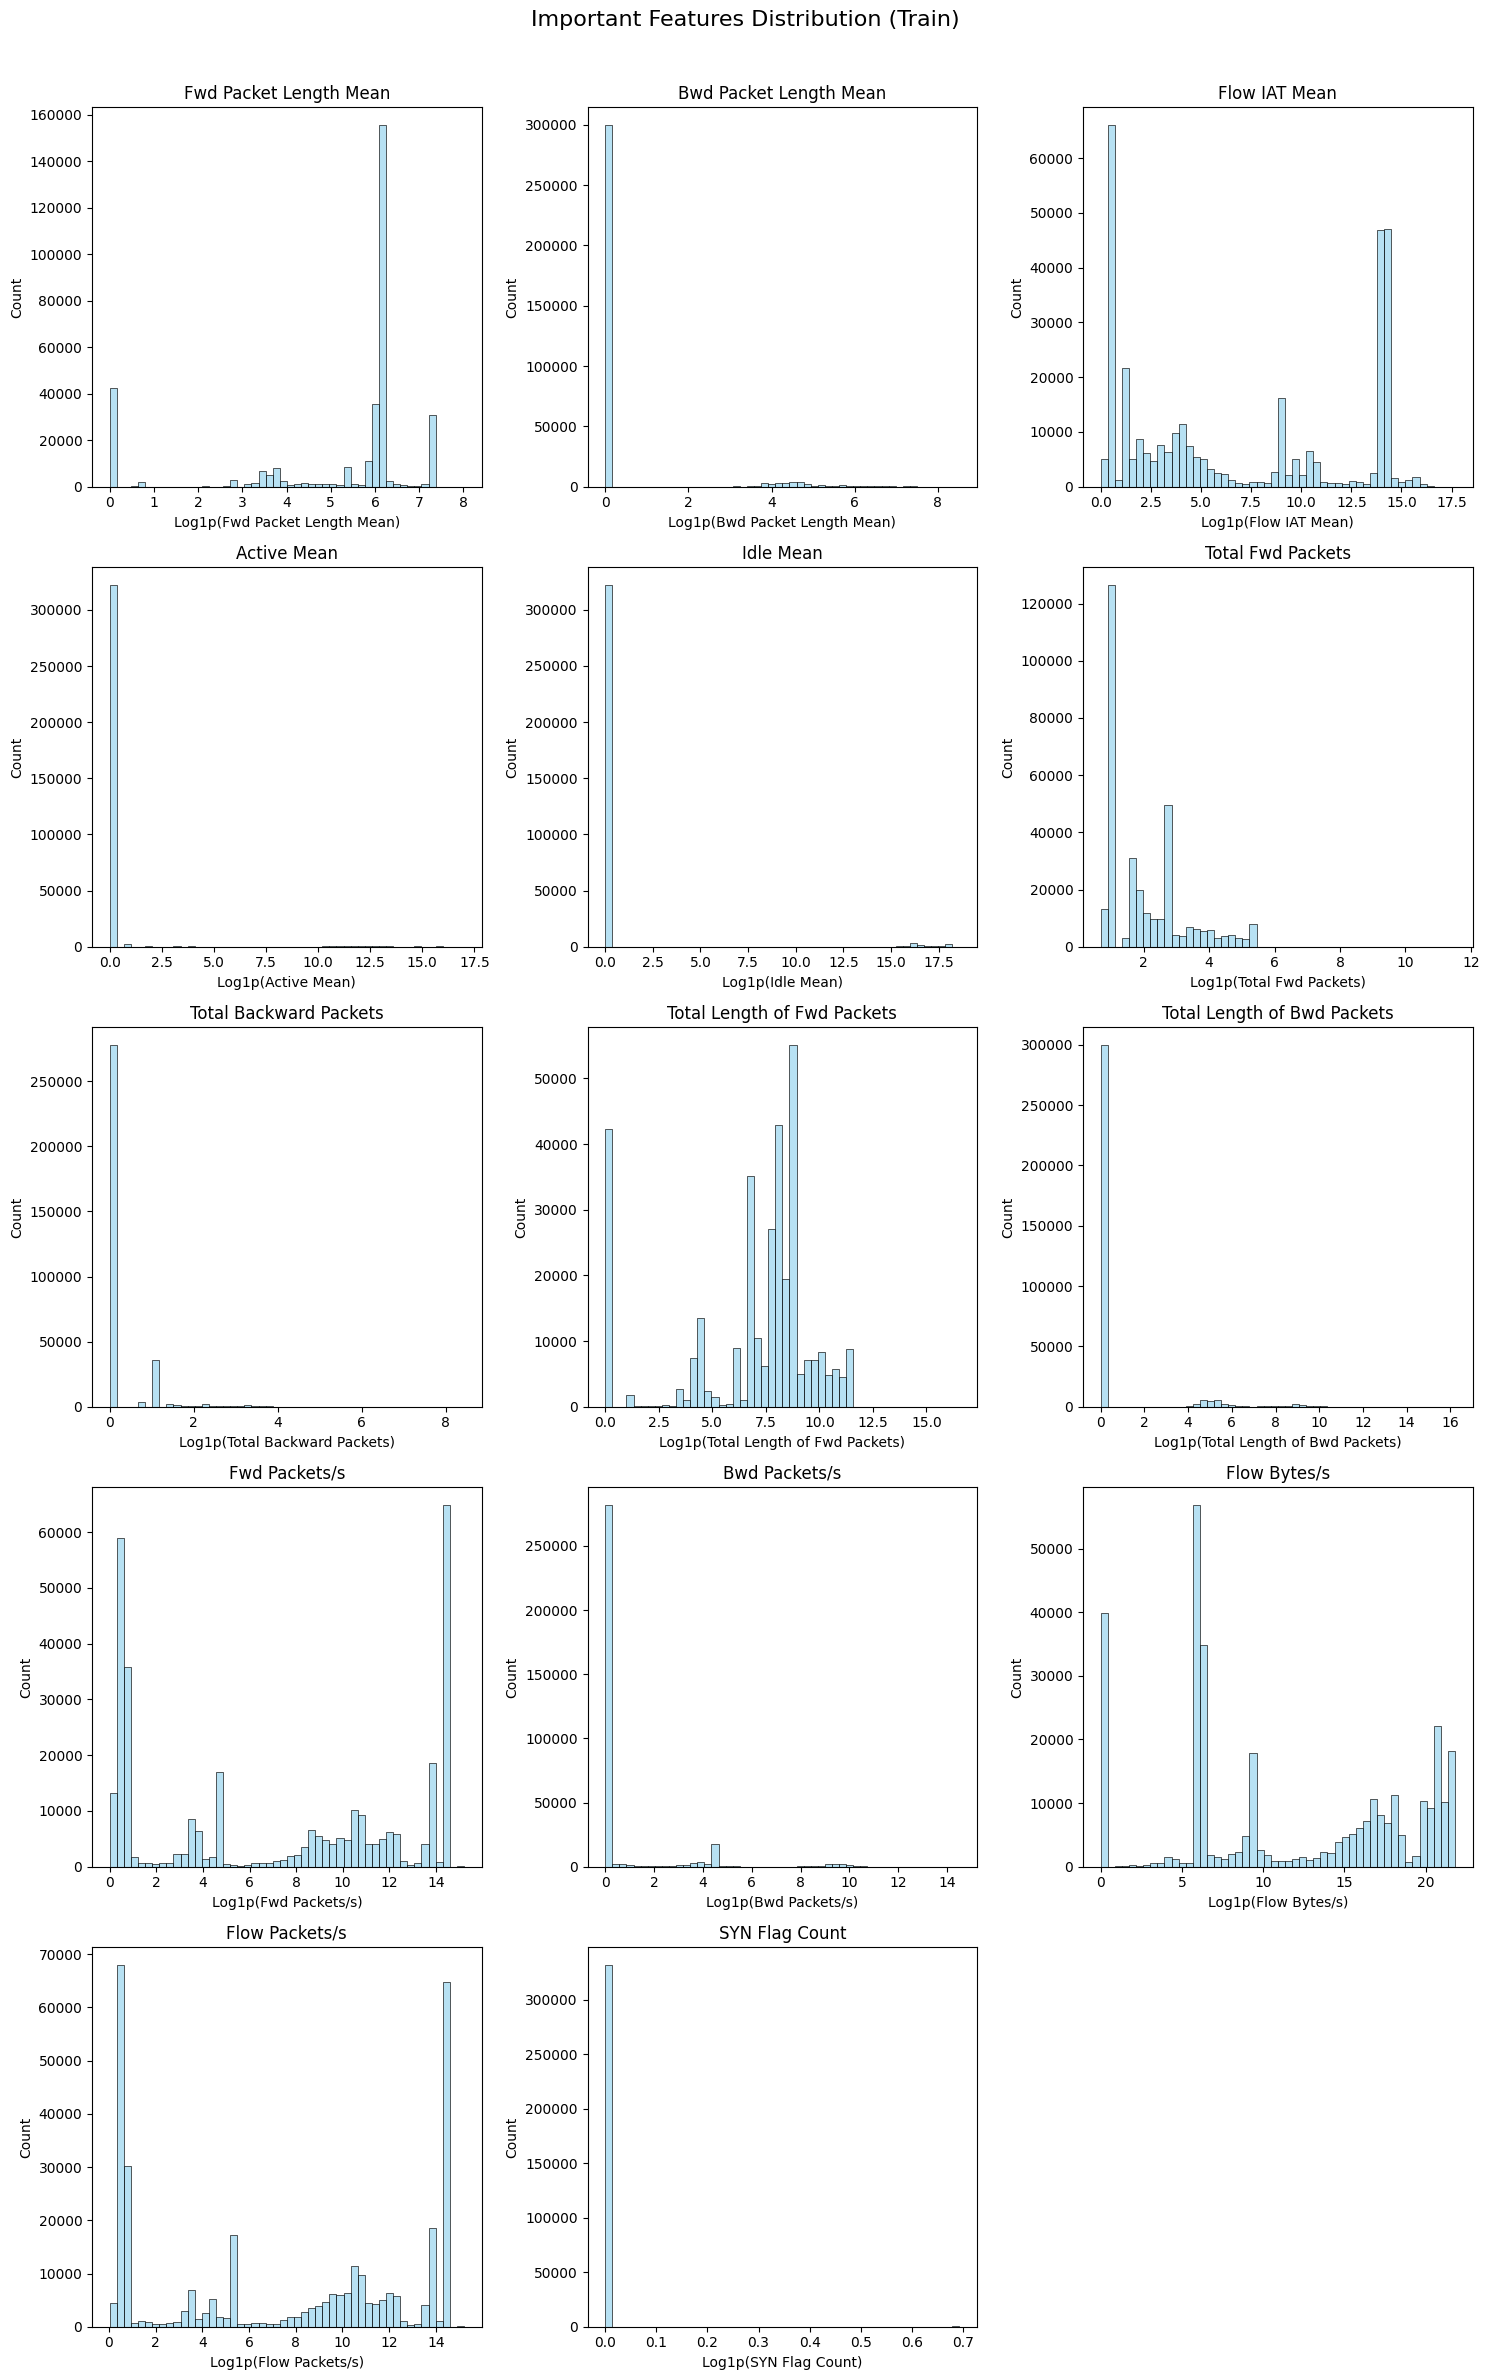

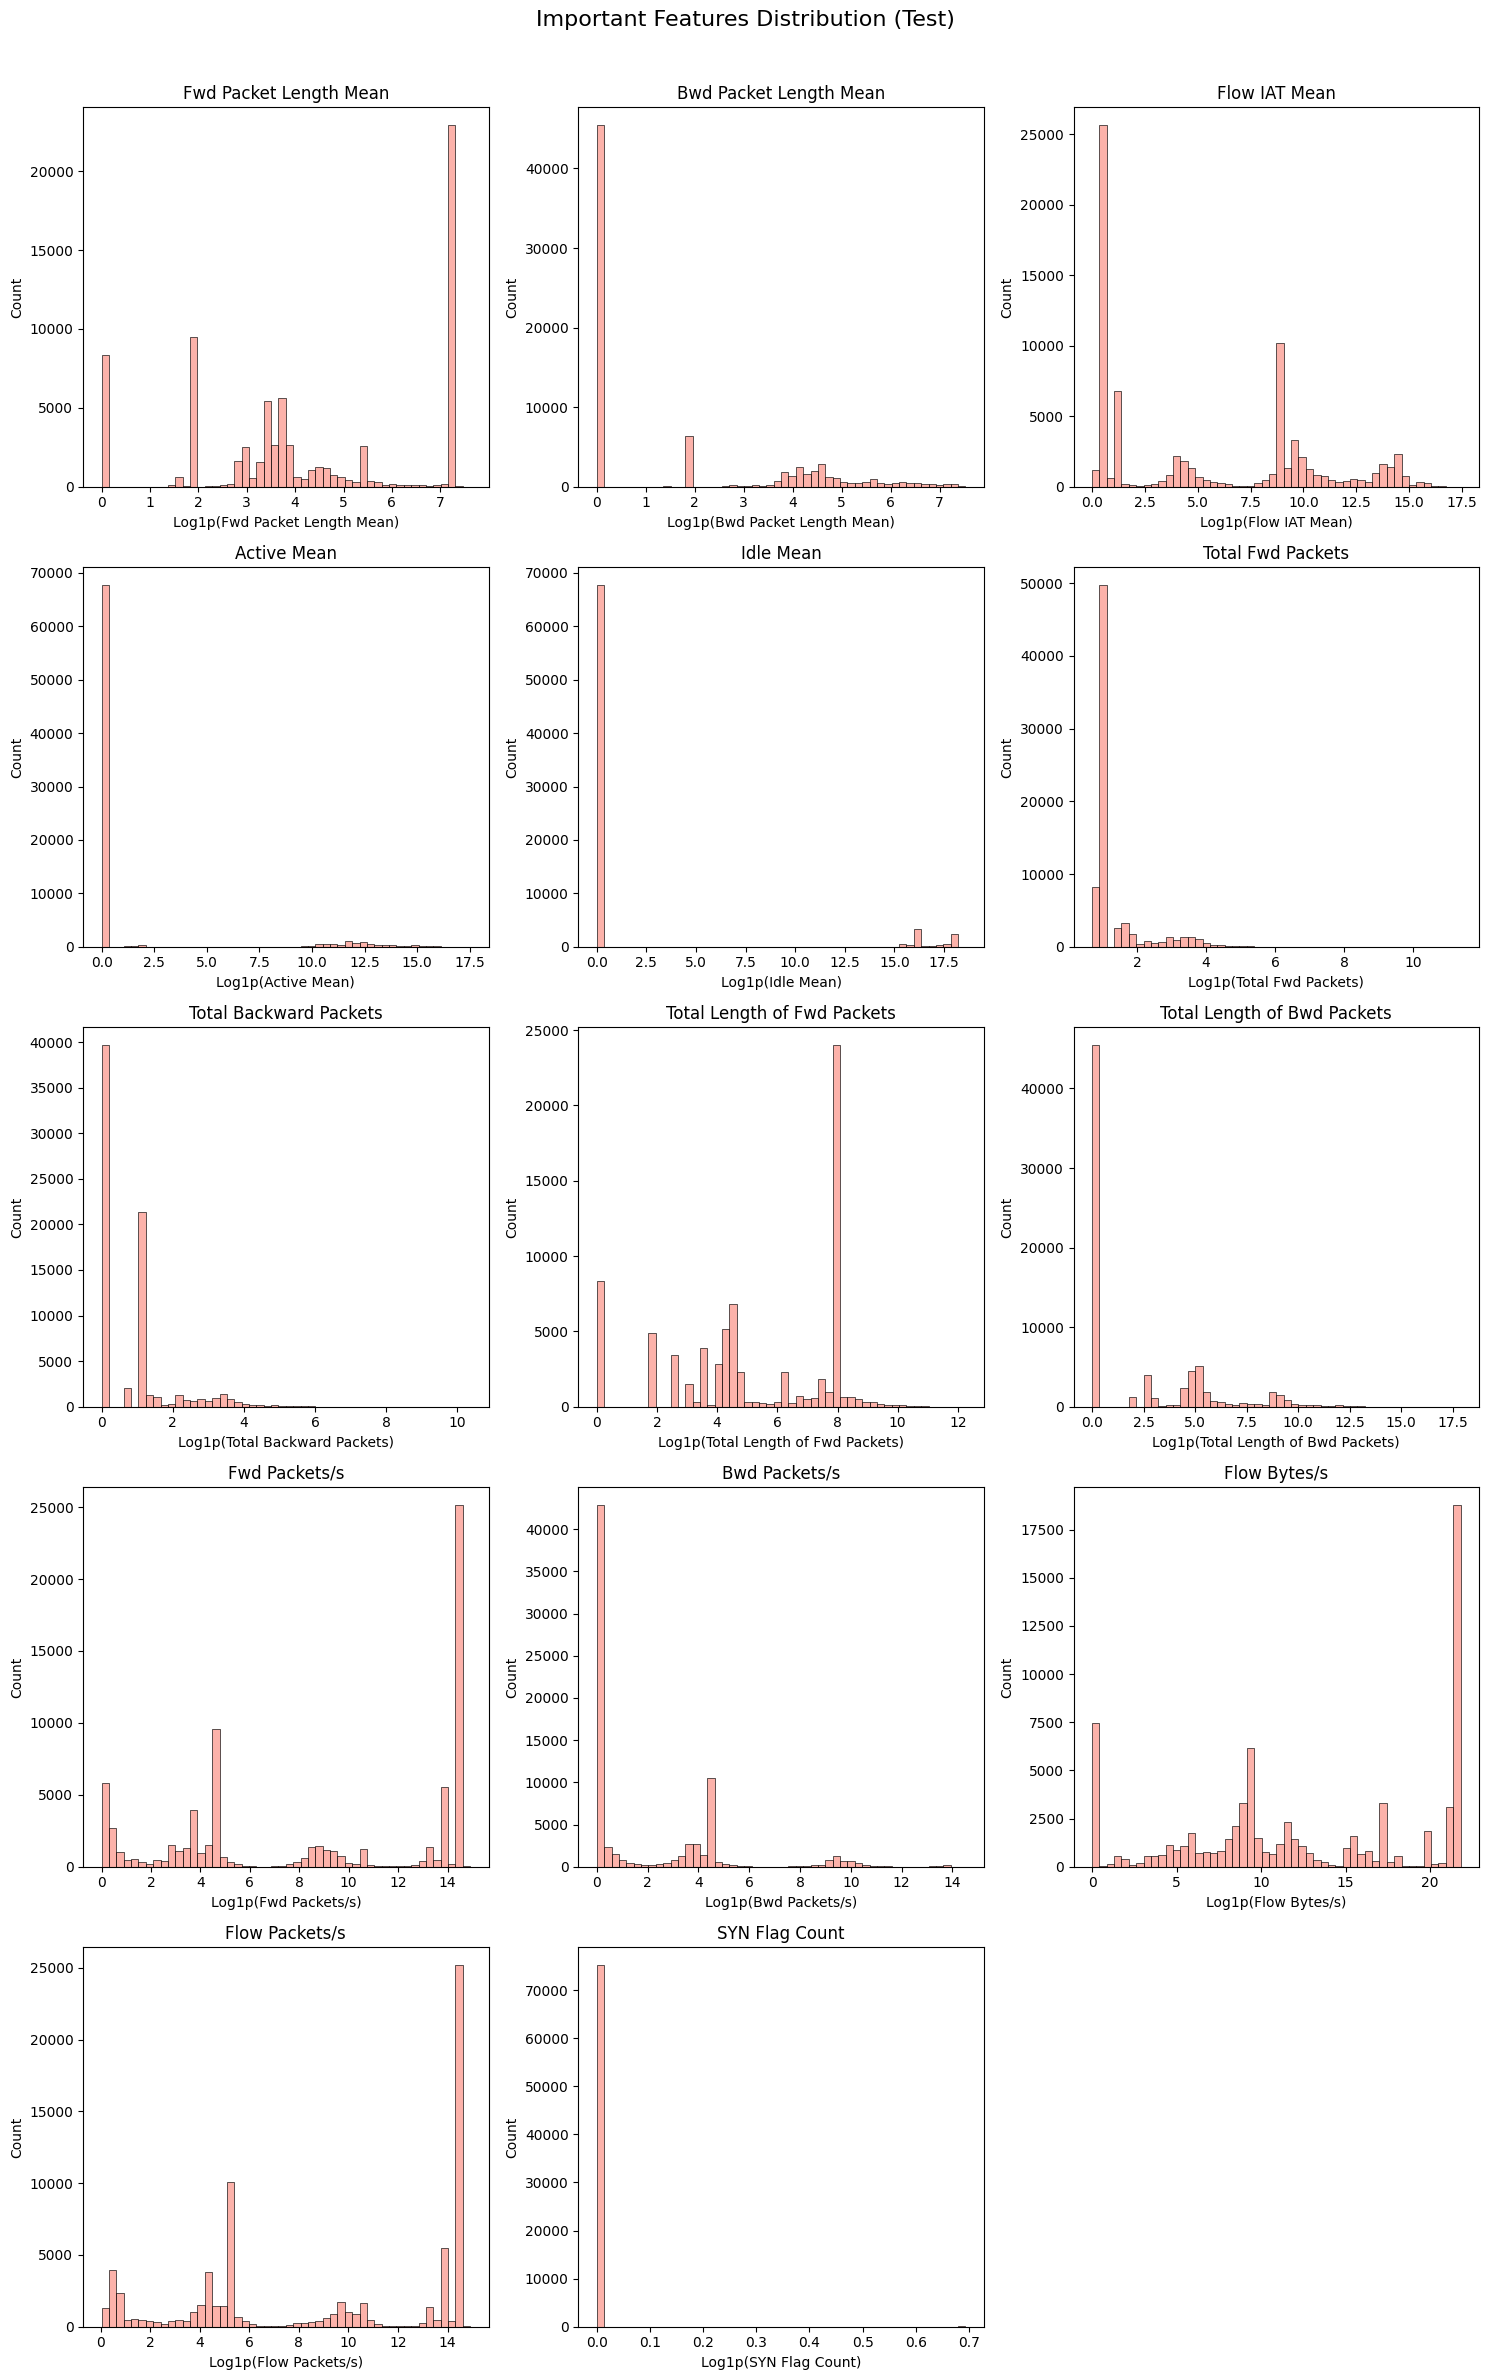

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# 載入資料
train_data = pd.read_csv('CIC-DDoS-2019/01-12/export_dataframe.csv')
test_data = pd.read_csv('CIC-DDoS-2019/01-12/export_tests.csv')

train_data.columns =train_data.columns.str.strip()
test_data.columns=test_data.columns.str.strip()

important_features = [
    'Fwd Packet Length Mean',
    'Bwd Packet Length Mean',
    'Flow IAT Mean',
    'Active Mean',
    'Idle Mean',
    'Total Fwd Packets',
    'Total Backward Packets',
    'Total Length of Fwd Packets',
    'Total Length of Bwd Packets',
    'Fwd Packets/s',
    'Bwd Packets/s',
    'Flow Bytes/s',
    'Flow Packets/s',
    'SYN Flag Count'
]

# 驗證特徵是否存在
valid_features = [feature for feature in important_features if feature in train_data.columns and feature in test_data.columns]

# 繪製重要特徵的分布（分開繪製）
def plot_distributions_grid(data, features, title, color, dataset_type):
    num_features = len(features)
    rows = (num_features + 2) // 3  # Ensure enough rows for all features
    fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))  # 建立子圖網格
    fig.suptitle(f'{title} ({dataset_type})', fontsize=16)

    for i, feature in enumerate(features):
        row, col = i // 3, i % 3  # 計算子圖的位置

        # 對數轉換
        data_to_plot = np.log1p(data[feature].abs())

        # 繪製直方圖
        sns.histplot(ax=axes[row, col], data=data_to_plot, bins=50, color=color, alpha=0.6, kde=False)

        axes[row, col].set_xlabel(f'Log1p({feature})', fontsize=10)
        axes[row, col].set_ylabel('Count', fontsize=10)
        axes[row, col].set_title(feature, fontsize=12)
        axes[row, col].grid(False)  # 移除網格線

    # 移除空白子圖
    for i in range(num_features, rows * 3):
        row, col = i // 3, i % 3
        fig.delaxes(axes[row, col])

    plt.tight_layout(rect=[0, 0.03, 1, 0.97])  # 調整佈局
    plt.show()

# 繪製訓練資料的重要特徵分布
plot_distributions_grid(train_data, valid_features, 'Important Features Distribution', 'skyblue', 'Train')

# 繪製測試資料的重要特徵分布
plot_distributions_grid(test_data, valid_features, 'Important Features Distribution', 'salmon', 'Test')

# print the counts of processed testing data

In [ ]:
import pandas as pd
tests_proc_df=pd.read_csv('CIC-DDoS-2019/01-12/export_tests_proc.csv')
print("Lable Values Counts:")
print(tests_proc_df[' Label'].value_counts())
print(f"資料總列數: {len(tests_proc_df)}")



Lable Values Counts:
 Label
0    49763
1    25620
Name: count, dtype: int64
資料總列數: 75383


# Importing required library

In [37]:
import tensorflow as tf
from tensorflow import keras
# Import required libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,GRU,Embedding,Dropout,Flatten,Conv1D,MaxPooling1D,LSTM
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

# train_test(samples) Receives a group of samples and split it in train/validation sets. (as the ratio 67% and 33%)

In [49]:


# 1. Define the train_test function
def train_test(samples): #定義一個名為train_test的函數，並傳入samples參數
    from sklearn.model_selection import train_test_split
    import numpy as np
    X = samples.iloc[:,0:(samples.shape[1]-1)]#取出所有行，從第0列到倒數第二列
    y = samples.iloc[:,-1]#取出所有行，最後一列
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 
    return X_train, X_test, y_train, y_test

# 2. Execute function and store results
# This line is required to create the variables!
X_train, X_test, y_train, y_test = train_test(samples)

# 3. Now we can print the shapes
print("Training set shape:", X_train.shape)#印出訓練集的形狀(X_train包含了67%的資料，82個特徵值)
print("Validation set shape:", X_test.shape)#印出測試集的形狀(X_test包含了33%的資料，82個特徵值)
print("Training labels shape:", y_train.shape)#印出訓練標籤的形狀(label(是否為ddos)這個欄位)
print("Validation labels shape:", y_test.shape)#印出測試標籤的形狀(label(是否為ddos)這個欄位)
X_train.to_csv(r'CIC-DDoS-2019/01-12/X_train.csv', index=None, header=True)
X_test.to_csv(r'CIC-DDoS-2019/01-12/X_test.csv', index=None, header=True)
y_test.to_csv(r'CIC-DDoS-2019/01-12/y_test.csv', index=None, header=True)
y_train.to_csv(r'CIC-DDoS-2019/01-12/y_train.csv', index=None, header=True)


Training set shape: (222358, 82)
Validation set shape: (109521, 82)
Training labels shape: (222358,)
Validation labels shape: (109521,)


In [51]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

def normalize_data_standard(X_train, X_test):
    columns = X_train.columns #取出X_train的所有列(保存欄位名稱)

    scaler=StandardScaler()
    X_train_standard = pd.DataFrame(scaler.fit_transform(X_train), columns=columns) #將X_train進行標準化處理，並將欄位名稱設為columns

    X_test_standard=pd.DataFrame(scaler.transform(X_test), columns=columns) #將X_test進行標準化處理，並將欄位名稱設為columns

    print("After Nomalization(StandardScaler)")
    print(f"X_train_standard min: {X_train_standard.min().min():.3f}")
    print(f"X_train_standard max: {X_train_standard.max().max():.3f}")
    print(f"X_train_standard mean: {X_train_standard.mean().mean():.3f}")

    print(f"X_test_standard min: {X_test_standard.min().min():.3f}")
    print(f"X_test_standard max: {X_test_standard.max().max():.3f}")
    print(f"X_test_standard mean: {X_test_standard.mean().mean():.3f}")

    return X_train_standard, X_test_standard #回傳X_train_standard和X_test_standard

X_train_standard, X_test_standard = normalize_data_standard(X_train, X_test) #呼叫normalize_data_standard函數，並將X_train和X_test傳入，並將回傳的X_train_standard和X_test_standard分別取名為X_train_standard和X_test_standard



After Nomalization(StandardScaler)
X_train_standard min: -59.992
X_train_standard max: 461.210
X_train_standard mean: -0.000
X_test_standard min: -59.992
X_test_standard max: 276.154
X_test_standard mean: -0.000


In [58]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def normalize_data(X_train, X_test):
    from sklearn.preprocessing import MinMaxScaler
    import pandas as pd

    columns = X_train.columns

    scaler = MinMaxScaler(feature_range=(-1, 1))  # 初始化 MinMaxScaler
    X_train_scaled_01 = pd.DataFrame(scaler.fit_transform(X_train), columns=columns)
    X_test_scaled_01 = pd.DataFrame(scaler.transform(X_test), columns=columns)

    print("After Normalization:")
    print(f"X_train_scaled min: {X_train_scaled_01.min().min():.3f}")
    print(f"X_train_scaled max: {X_train_scaled_01.max().max():.3f}")
    print(f"X_train_scaled mean: {X_train_scaled_01.mean().mean():.3f}")

    print(f"X_test_scaled min: {X_test_scaled_01.min().min():.3f}")
    print(f"X_test_scaled max: {X_test_scaled_01.max().max():.3f}")
    print(f"X_test_scaled mean: {X_test_scaled_01.mean().mean():.3f}")

    return X_train_scaled_01, X_test_scaled_01
X_train_scaled_01, X_test_scaled_01 = normalize_data(X_train, X_test) #呼叫normalize_data函數，並將X_train和X_test傳入，並將回傳的X_train_scaled_01和X_test_scaled_01分別取名為X_train_scaled_01和X_test_scaled_01

NameError: name 'X_test' is not defined

### normalize_data(X_train,X_test) Normalize data between -1 and 1

In [52]:
# normalize input data

def normalize_data(X_train,X_test):#定義一個名為normalize_data的函數，並傳入X_train和X_test參數
    # Import `StandardScaler` from `sklearn.preprocessing`
    from sklearn.preprocessing import StandardScaler,MinMaxScaler#從sklearn.preprocessing導入StandardScaler和MinMaxScaler，用於標準化和歸一化
    import pandas as pd
    
    columns = X_train.columns#取出X_train的所有列(保存欄位名稱)
    # Define the scaler 
    #scaler = StandardScaler().fit(X_train)
    scaler = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)#定義scaler，使用MinMaxScaler對X_train進行標準化，特徵範圍為(-1,1)
    
    # Scale the train set
    X_train_scaled = pd.DataFrame(scaler.transform(X_train),columns=columns) #對X_train進行標準化(-1~1)，並保存到X_train_scaled中
    
    # Scale the test set
    X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=columns)#對X_test進行標準化(-1~1)，並保存到X_test_scaled中
    
    print("After Normalization:")
    print(f"X_train_scaled min: {X_train_scaled.min().min():.3f}")
    print(f"X_train_scaled max: {X_train_scaled.max().max():.3f}")
    print(f"X_train_scaled mean: {X_train_scaled.mean().mean():.3f}")

    print(f"X_test_scaled min: {X_test_scaled.min().min():.3f}")
    print(f"X_test_scaled max: {X_test_scaled.max().max():.3f}")
    print(f"X_test_scaled mean: {X_test_scaled.mean().mean():.3f}")
    return X_train_scaled, X_test_scaled
#執行函數並存儲結果
X_train_scaled, X_test_scaled=normalize_data(X_train,X_test)


After Normalization:
X_train_scaled min: -1.000
X_train_scaled max: 1.000
X_train_scaled mean: -0.778
X_test_scaled min: -1.000
X_test_scaled max: 2.220
X_test_scaled mean: -0.778


### format_{2,3}d()

> Reshape data in 3d or 2d format (for input in methods such as GRU, CNN and LSTM)

In [40]:
# Reshape data input

def format_3d(df):
    
    X = np.array(df)
    return np.reshape(X, (X.shape[0], X.shape[1], 1))

def format_2d(df):
    
    X = np.array(df)
    return np.reshape(X, (X.shape[0], X.shape[1]))

X_train_3d=format_3d(X_train_scaled)
X_train_2d=format_2d(X_train_scaled)
# 驗證變數已建立
print("資料形狀:")
print(f"3D shape: {X_train_3d.shape}")
print(f"2D shape: {X_train_2d.shape}")

資料形狀:
3D shape: (222358, 82, 1)
2D shape: (222358, 82)


> **Dataset - CIC-DDoS2019**

Loading training dataset (day 1), upsampling normal flows for balancing the training set.

In [ ]:
# UPSAMPLE OF NORMAL FLOWS

samples = pd.read_csv('CIC-DDoS-2019/01-12/export_dataframe_proc.csv', sep=',')#讀取export_dataframe_proc.csv(這是經過前處理的訓練資料)文件 ,表示逗號分隔

X_train, X_test, y_train, y_test = train_test(samples) #執行train_test函數，並將結果存儲到X_train, X_test, y_train, y_test中


#junta novamente pra aumentar o numero de normais
X = pd.concat([X_train, y_train], axis=1) #將X_train和y_train合併，並保存到X中 (X=X_train+y_train)

# separate minority and majority classes
is_benign = X[' Label']==0 #取出所有正常的樣本

normal = X[is_benign] #取出所有正常的樣本(取名為normal)
ddos = X[~is_benign]#取出所有異常的樣本(取名為ddos)

# upsample minority
normal_upsampled = resample(normal,#使用resample函數對normal進行上採樣
                          replace=True, # 允許重複取樣
                          n_samples=len(ddos), # 採樣數量與ddos樣本數相同
                          random_state=27) # 設置隨機狀態(27代表隨機狀態))

# combine majority and upsampled minority
upsampled = pd.concat([normal_upsampled, ddos])#將normal_upsampled和ddos合併，並保存到upsampled中

# Specify the data 
X_train=upsampled.iloc[:,0:(upsampled.shape[1]-1)] #取出所有行，從第0列到倒數第二列(82個特徵值)
y_train= upsampled.iloc[:,-1]  #DDoS #取出所有行，最後一列(label:標籤)

input_size = (X_train.shape[1], 1)#輸入大小為(特徵數,1)
print(f"Input size: {input_size}")
print(f"X_train shape: {X_train.shape}")
print(f"Number of features: {X_train.shape[1]}")


del X, normal_upsampled, ddos, upsampled, normal #, l1, l2  #刪除變數(釋放內存)
X_train.to_csv('CIC-DDoS-2019/01-12/X_train_upsampled.csv', index=None, header=True)
y_train.to_csv('CIC-DDoS-2019/01-12/Y_train_upsampled.csv', index=None, header=True)

Input size: (82, 1)
X_train shape: (368604, 82)
Number of features: 82


In [61]:
tests = pd.read_csv('CIC-DDoS-2019/01-12/export_tests_proc.csv', sep=',')#讀取export_tests_proc.csv(這是經過前處理的測試資料)文件 ,表示逗號分隔

# X_test = np.concatenate((X_test,(tests.iloc[:,0:(tests.shape[1]-1)]).to_numpy())) # testar 33% + dia de testes
# y_test = np.concatenate((y_test,tests.iloc[:,-1]))

# del X_test,y_test                            # 釋放原本的測試集資料
X_test_ext = tests.iloc[:,0:(tests.shape[1]-1)]  # 取出所有行，從第0列到倒數第二列(82個特徵值)                  
y_test_ext = tests.iloc[:,-1] #取出所有行，最後一列(label:標籤)

# print((y_test.shape))
# print((X_test.shape))

# X_train_normalized, X_test_normalized = normalize_data(X_train,X_test_ext) #執行normalize_data函數，(將特徵範圍限縮到-1~`)並將結果存儲到X_train和X_test中

scaler=MinMaxScaler(feature_range=(-1, 1))
scaler.fit(X_train)
X_train_scaled_for_tesing= scaler.transform(X_train)
X_test_ext_scaled=scaler.transform(X_test_ext)
#驗證準化結果
print(f"X_train_normalized shape: {X_train_scaled_for_tesing.shape}")
print(f"X_test_normalized shape: {X_test_ext_scaled.shape}")
print(f"X_train_normalized range: [{X_train_scaled_for_tesing.min().min():.3f}, {X_train_scaled_for_tesing.max().max():.3f}]")
print(f"X_test_ext_scaled range: [{X_test_ext_scaled.min():.3f}, {X_test_ext_scaled.max():.3f}]")

X_test_ext.to_csv('CIC-DDoS-2019/01-12/X_test_ext.csv', index=None, header=True)
y_test_ext.to_csv('CIC-DDoS-2019/01-12/Y_test_ext.csv', index=None, header=True)

X_train_normalized shape: (222358, 82)
X_test_normalized shape: (75383, 82)
X_train_normalized range: [-1.000, 1.000]
X_test_ext_scaled range: [-14.999, 14.898]


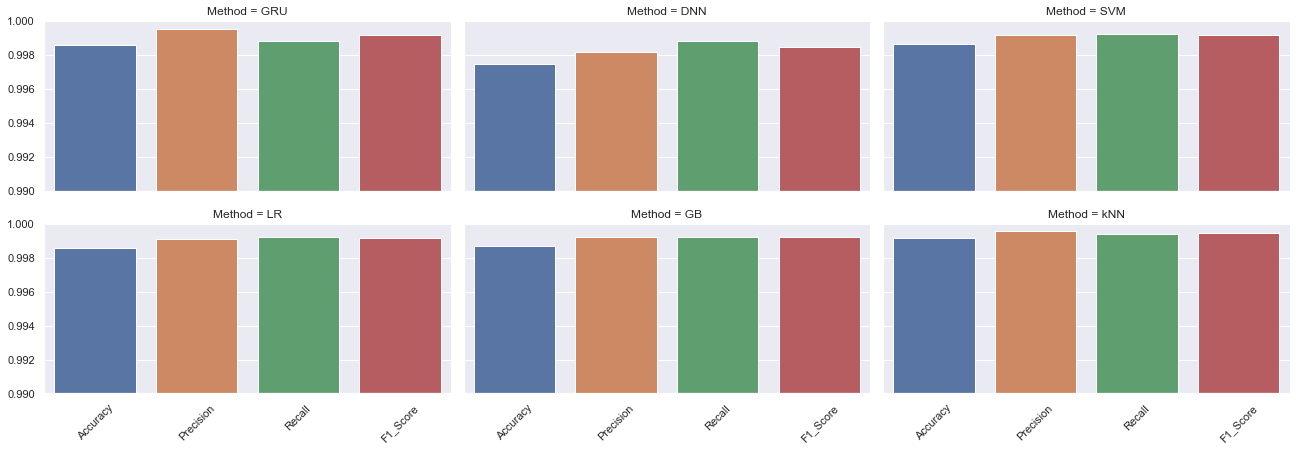

In [316]:
ax = sns.catplot(data=results.iloc[:,:5].query('Method != "LSTM" and Method != "CNN"'), col='Method', col_wrap=3, kind='bar', height=3, aspect=2)
ax.set(ylim=(0.99,1))
ax.set_xticklabels(rotation=45)
ax = ax


> As observed, the evaluated methods achieved good performance outcomes close to 1. As the evaluated methods achieved similar outcomes, a more specific analysis should be performed.

Showing results of the LSTM and CNN methods.

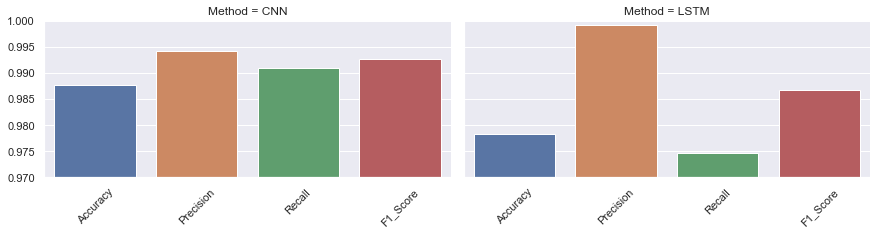

In [349]:
ax = sns.catplot(data=results.iloc[:,:5].query('Method == "LSTM" or Method == "CNN"'), col='Method', col_wrap=3, kind='bar', height=3, aspect=2)
ax.set(ylim=(0.97,1))
ax.set_xticklabels(rotation=45)
ax = ax

> CNN and LSTM fared worse between the tested approaches. However, these methods achieved performance metrics above 97%, which is a relatively good outcome. 

**Average of the Metrics**

Plotting the Average of the previously mentioned performance metrics to summarize the method's results. 

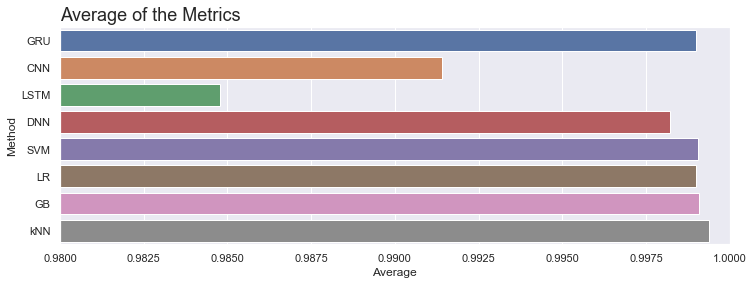

In [367]:
plt.figure(figsize=(12,4))
ax = sns.barplot(data=results, y='Method', x='Average')
ax.set(xlim=(0.98,1))
ax.set_title('Average of the Metrics', fontsize=18, loc='left')
ax.set_xticklabel()
ax = ax

> As observed, on average, kNN fared slightly better compared to GB, LR, SVM, and GRU, which, in turn, achieved very similar results. However, these methods performed nearly 99.9%, which is considered a good classification outcome. 

**Detection rate of Normal and Attack flow records**

The following plot shows the results of each method for classifying normal and attack flow records.

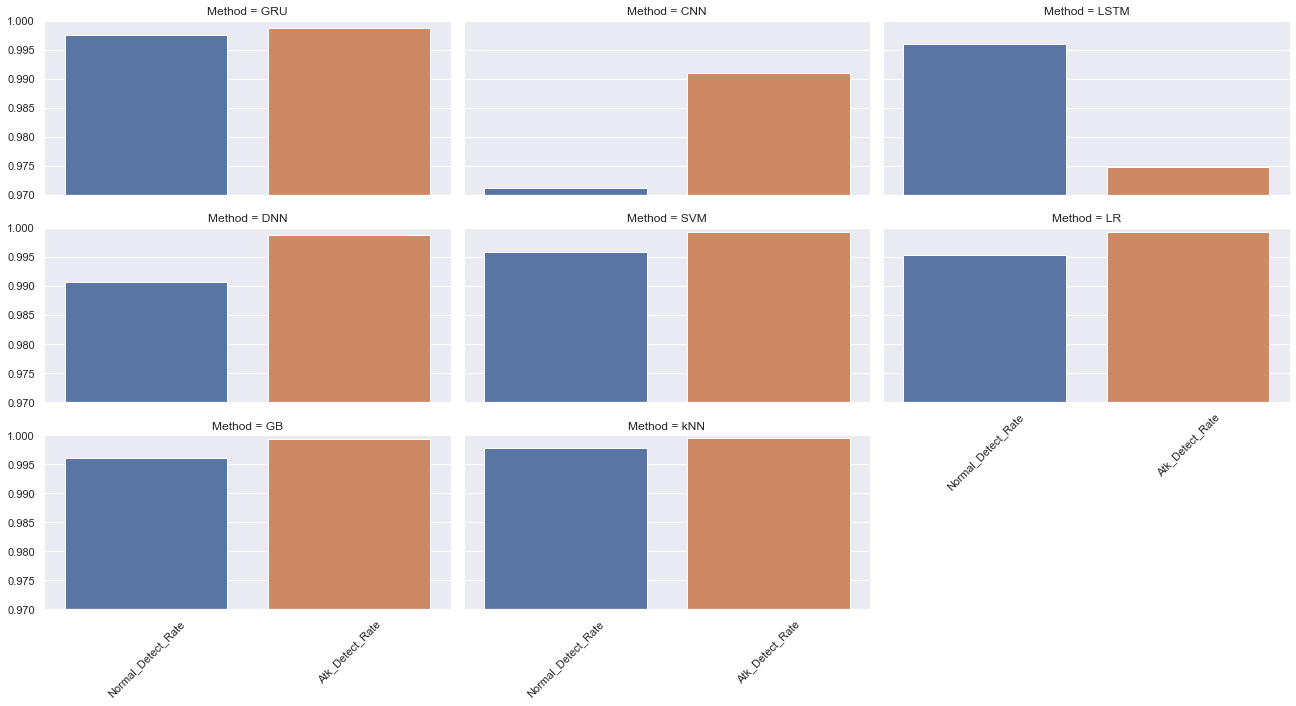

In [368]:
ax = sns.catplot(data=results[['Method', 'Normal_Detect_Rate', 'Atk_Detect_Rate']], col='Method', col_wrap=3, kind='bar', height=3, aspect=2)
ax.set(ylim=(0.97,1))
ax.set_xticklabels(rotation=45)
ax = ax


> kNN achieved the best classification outcomes. 

> GRU showed the most balanced approach regarding classifying normal and attack flows. 

> Although CNN achieved a relatively good classification of attacks, the classification of normal record flows was low compared to other methods. This result can explain the Accuracy rate of this method. This situation also occurs with the LSTM method, which achieved a good classification rate for normal flows and a low classification rate for attack ones. 